In [1]:
import pandas as pd
import allel
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_merge = pd.read_csv('../analysis_files/df_merged.csv')

In [5]:
print(df_merge)

     Unnamed: 0         tool  threshold strain  nTP    nFP   nTN  n_true  nFN  \
0             0    BioGraph*         10  AKR_J   36    389   206     504  468   
1             1    BioGraph*        100  AKR_J  249    176   289     504  255   
2             2    BioGraph*       1000  AKR_J  269    156   299     504  235   
3             3    BioGraph*      10000  AKR_J  291    134   347     504  213   
4             4  breakdancer         10  AKR_J    9    527   253     504  495   
5             5  breakdancer        100  AKR_J  254    282   314     504  250   
6             6  breakdancer       1000  AKR_J  311    225   348     504  193   
7             7  breakdancer      10000  AKR_J  325    211   393     504  179   
8             8       clever         10  AKR_J   54   9551    31     504  450   
9             9       clever        100  AKR_J  336   9269    53     504  168   
10           10       clever       1000  AKR_J  396   9209    75     504  108   
11           11       clever

# Figure 2a - Sensitivity

/home/vs/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


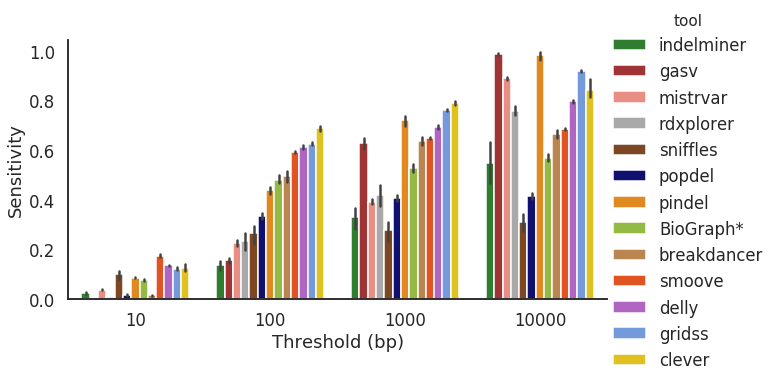

In [6]:
%store -r
fig2a=sns.set_style("white")
fig2a=sns.set_context("talk")

fig_order = ["indelminer","gasv","mistrvar","rdxplorer","sniffles","popdel","pindel","BioGraph*","breakdancer","smoove","delly","gridss","clever"]

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2a = sns.catplot(x="threshold", y="sensitivity", kind="bar",errwidth=2.5,data = df_merge,hue="tool",aspect=1.8, palette=pal,hue_order=fig_order)
fig2a.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
fig2a=sns.despine()
plt.xticks(rotation=0)
#plt.show(fig2a)

plt.savefig("../figures/fig2/fig2a", bbox_inches='tight')
plt.savefig("../figures/fig2/fig2a.pdf", bbox_inches='tight')

# Figure 2b - Precision

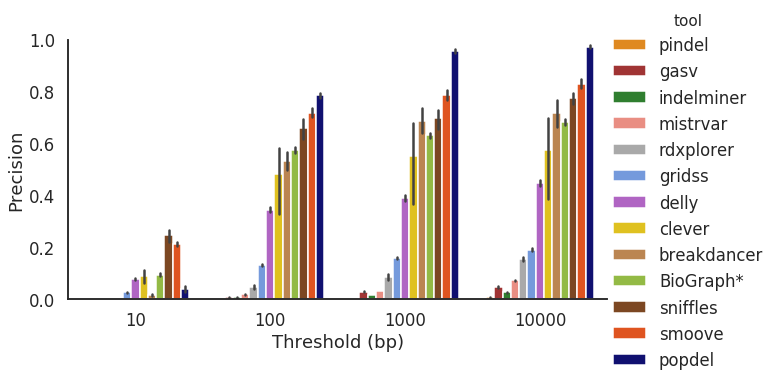

In [7]:
%store -r
fig2b=sns.set_style("white")
fig2b=sns.set_context("talk")

fig_order = ['pindel','gasv','indelminer',
             'mistrvar','rdxplorer','gridss',
            'delly','clever',
            'breakdancer','BioGraph*','sniffles','smoove','popdel']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2b = sns.catplot(x="threshold", y="precision", kind="bar",errwidth=2.5,data = df_merge,hue='tool',aspect=1.8, palette=pal,hue_order=fig_order)
plt.ylim(0, 1)
fig2b.set(xlabel='Threshold (bp)', ylabel='Precision')
fig2b=sns.despine()
#plt.show(fig2b)

plt.savefig("../figures/fig2/fig2b", bbox_inches='tight')
plt.savefig("../figures/fig2/fig2b.pdf", bbox_inches='tight')

# Figure 2c - Specificity

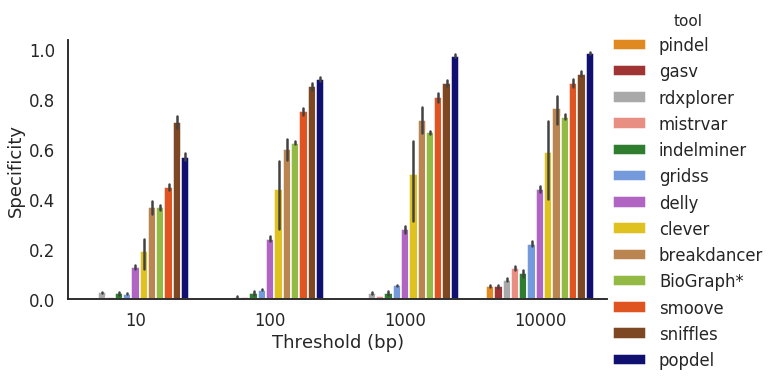

In [8]:
%store -r
fig2c=sns.set_style("white")
fig2c=sns.set_context("talk")

fig_order = ["pindel","gasv","rdxplorer","mistrvar","indelminer","gridss","delly","clever","breakdancer","BioGraph*","smoove","sniffles","popdel"]

pal = []
for tool in fig_order:
    pal.append(color_map[tool])


fig2c = sns.catplot(x="threshold", y="specificity", kind="bar",errwidth=2.5,data = df_merge,hue='tool',aspect=1.8, palette=pal,hue_order=fig_order)
fig2c.set(xlabel='Threshold (bp)', ylabel='Specificity')
fig2c=sns.despine()
#plt.show(fig2c)

plt.savefig("../figures/fig2/fig2c", bbox_inches='tight')
plt.savefig("../figures/fig2/fig2c.pdf", bbox_inches='tight')

# Figure 2d - F-score

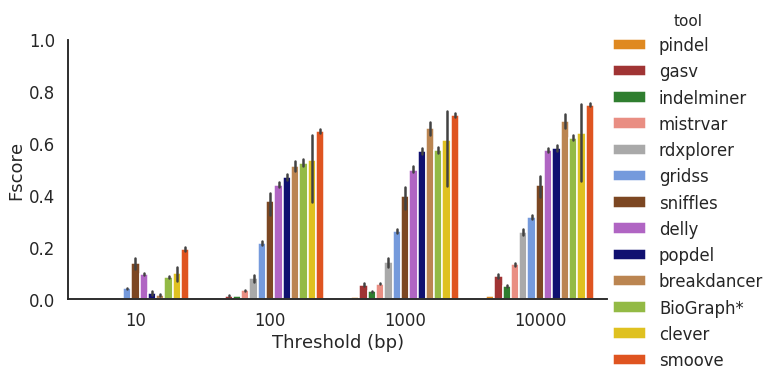

In [9]:
%store -r
fig2d=sns.set_style("white")
fig2d=sns.set_context("talk")

fig_order = ["pindel","gasv","indelminer","mistrvar","rdxplorer","gridss","sniffles","delly","popdel","breakdancer","BioGraph*","clever","smoove"]
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2d = sns.catplot(x="threshold", y="f-score", kind="bar",errwidth=2.5,data = df_merge,hue='tool',aspect=1.8, palette=pal,hue_order=fig_order)
fig2d.set(xlabel='Threshold (bp)', ylabel='Fscore')
fig2d=sns.despine()
plt.ylim(0, 1)
#plt.show(fig2d)

plt.savefig("../figures/fig2/fig2d", bbox_inches='tight')
plt.savefig("../figures/fig2/fig2d.pdf", bbox_inches='tight')

In [18]:
df_mean=df_merge.groupby(['tool','threshold'],as_index=False).mean()
df_mean.head()

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,BioGraph*,10,156.0,42.428571,411.142857,238.857143,542.714286,500.285714,0.078281,0.093773,0.367228,0.085301
1,BioGraph*,100,157.0,261.000000,192.571429,321.285714,542.714286,281.714286,0.481218,0.576129,0.625650,0.524250
2,BioGraph*,1000,158.0,286.285714,167.285714,333.000000,542.714286,256.428571,0.527502,0.631530,0.665834,0.574669
3,BioGraph*,10000,159.0,309.000000,144.571429,388.142857,542.714286,233.714286,0.569452,0.681937,0.728891,0.620445
4,breakdancer,10,160.0,8.285714,497.714286,289.428571,542.714286,534.428571,0.015434,0.016424,0.368414,0.015859


# Figure 2e

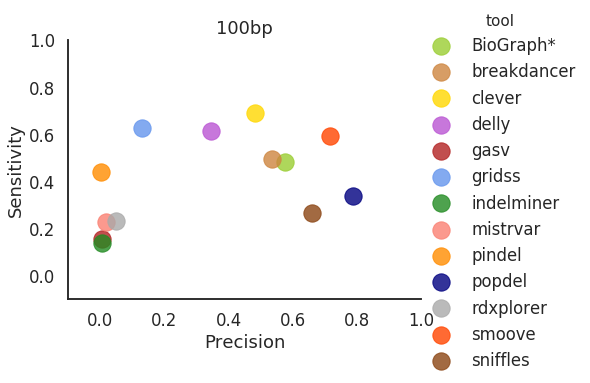

In [19]:
for th in [100]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='sensitivity', hue='tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 300}, palette=color_map)
    g.set(xlabel='Precision', ylabel='Sensitivity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1)
    g=plt.ylim(-0.1, 1)
    g=sns.despine()

plt.savefig("../figures/fig2/fig2e", bbox_inches='tight')

# Figure 2f

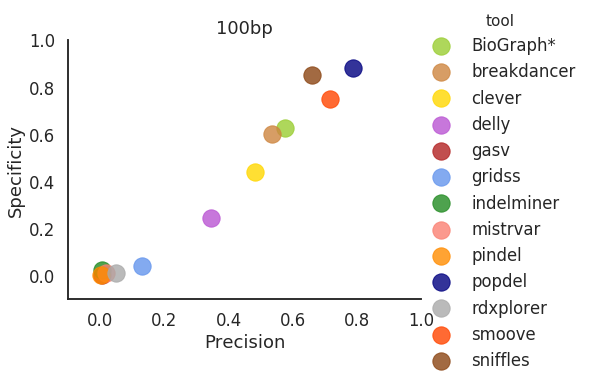

In [20]:
for th in [100]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='specificity', hue='tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 300}, palette=color_map)
    g.set(xlabel='Precision', ylabel='Specificity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1)
    g=plt.ylim(-0.1, 1)
    g=sns.despine()

plt.savefig("../figures/fig2/fig2f", bbox_inches='tight')